In [113]:
import annotation_analysis as an
from Data import symbol_graph as sg
from importlib import reload
reload(an); reload(sg)

<module 'Data.symbol_graph' from '/home/javierfumanal/Documents/GitHub/context-art-classification/Data/symbol_graph.py'>

In [5]:
symbol_context, paintings_names, symbols_names = an.__load_semart_proxy(mode='train')

NameError: name 'Gallery' is not defined

In [114]:
semart_Gallery = an.Gallery(symbols_names, paintings_names, symbol_context, an.args_dict.dir_dataset)

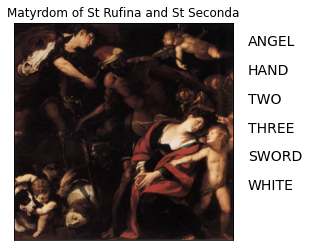

In [89]:
semart_Gallery.vis_painting_symbols(9853, True)

In [115]:
semart_Gallery.density_symbolic_paintings(10)

array([15579, 17716,  5430,  2228,  6379, 10818,  9605, 14981,  6411,
        2436])

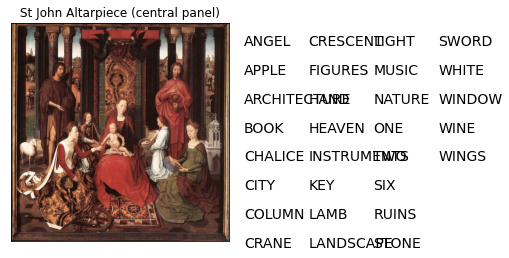

In [117]:
semart_Gallery.vis_painting_symbols(2228, True)

In [111]:
semart_Gallery.symbol_context.sum(axis=1).argmax()

15579